In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, save_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2

In [2]:
path = 'preprocessed_new'

In [3]:
gestures =os.listdir(path)
print(gestures)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'Best of luck', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'I Love you', 'J', 'K', 'L', 'Love', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [4]:
dict_labels = {
    '0':1,
    '1':2,
    '2':3,
    '3':4,
    '4':5,
    '5':6,
    '6':7,
    '7':8,
    '8':9,
    '9':10,
    'A':11,
    'B':12,
    'Best of luck':13,
    'C':14,
    'D':15,
    'E':16,
    'F':17,
    'G':18,
    'H':19,
    'I':20,
    'I Love you':21,
    'J':22,
    'K':23,
    'L':24,
    'Love':25,
    'M':26,
    'N':27,
    'O':28,
    'P':29,
    'Q':30,
    'R':31,
    'S':32,
    'T':33,
    'U':34,
    'V':35,
    'W':36,
    'X':37,
    'Y':38,
    'Z':39
    
}

In [5]:
print(list(dict_labels.keys()))
print(list(dict_labels.values()))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'Best of luck', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'I Love you', 'J', 'K', 'L', 'Love', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [6]:
x, y = [], []
for ix in gestures:
    images = os.listdir(path + '/' + str(ix))
    for cx in images:
        img_path = path + '/'+ str(ix) + '/' + cx
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels.get(ix))

In [7]:
X = np.array(x)
Y = np.array(y)
Y = np_utils.to_categorical(Y)
Y.shape

(93600, 40)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='count'>

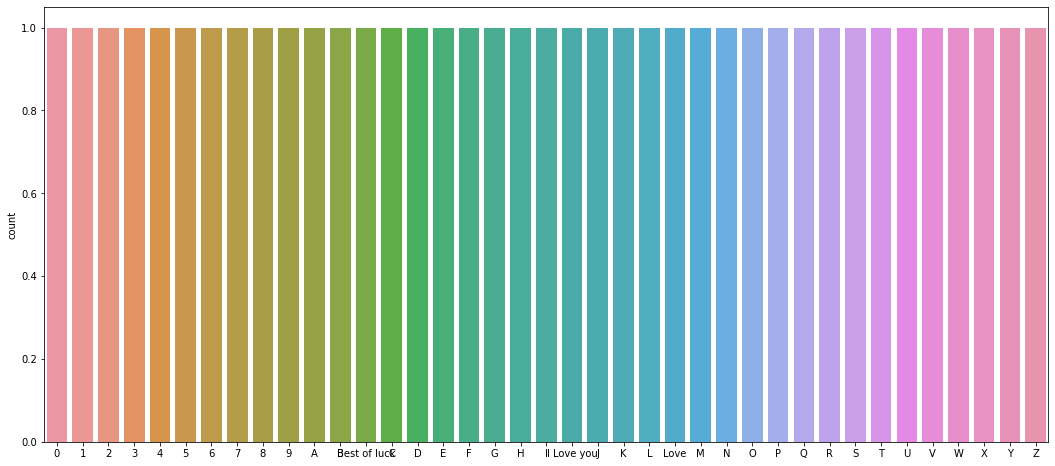

In [9]:
plt.figure(figsize = (18,8))
sns.countplot(x=list(dict_labels.keys()))

In [10]:
Y.shape

(93600, 40)

In [11]:
categories = Y.shape[1]

In [12]:
X, Y = shuffle(X, Y, random_state=0)

In [13]:
X.shape

(93600, 50, 50, 1)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [15]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
print(X_test)
print(Y_test)

(65520, 50, 50, 1) (28080, 50, 50, 1)
(65520, 40) (28080, 40)
[[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
  

In [16]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(categories, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [17]:
# model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss='categorical_crossentropy',
    # List of metrics to monitor
    metrics=['accuracy'],
)

In [18]:

# history = model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=[X_test, Y_test])
history = model.fit(X_train,Y_train,batch_size=128,epochs=50,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, Y_test),
)

Epoch 1/50
512/512 [==============================] - 205s 399ms/step - loss: 0.2394 - accuracy: 0.9330 - val_loss: 0.0042 - val_accuracy: 0.9985
Epoch 2/50
512/512 [==============================] - 204s 399ms/step - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.0012 - val_accuracy: 0.9996
Epoch 3/50
512/512 [==============================] - 201s 392ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 9.4843e-04 - val_accuracy: 0.9998
Epoch 4/50
512/512 [==============================] - 203s 396ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0014 - val_accuracy: 0.9998
Epoch 5/50
512/512 [==============================] - 201s 392ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 2.8842e-04 - val_accuracy: 0.9999
Epoch 6/50
512/512 [==============================] - 200s 391ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0014 - val_accuracy: 0.9996
Epoch 7/50
512/512 [==============================] - 190s 371ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

acc,val_acc=model.evaluate(X_test,Y_test)

878/878 [==============================] - 18s 21ms/step - loss: 9.9774e-05 - accuracy: 0.9999


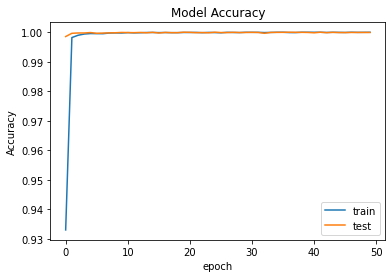

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()

In [30]:
model.save('./new_model23.h5')

In [31]:
from keras.models import load_model


In [33]:
m = load_model('./new_model23.h5')

In [34]:
path='preprocessed_new'

In [35]:
test_data = os.listdir(path)
print(test_data)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'Best of luck', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'I Love you', 'J', 'K', 'L', 'Love', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [37]:
x, y = [], []
for ix in test_data:
    images = os.listdir(path +'/'+ix)
    for cx in range(1,201):
        img_path = path+'/' + ix + '/' + str(cx) + '.jpg'
        img = cv2.imread(img_path,0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels.get(ix))

In [38]:
X_t = np.array(x)
y_t = np.array(y)
Y_t = np_utils.to_categorical(y_t)

In [39]:
X_t.shape

(7800, 50, 50, 1)

In [40]:
y_pred = m.predict(X_t)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(Y_t, y_pred.round())

0.9998717948717949

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_pred.round(), Y_t))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       1.00      1.00      1.00       200
           9       1.00      1.00      1.00       200
          10       1.00      1.00      1.00       200
          11       1.00      1.00      1.00       200
          12       1.00      1.00      1.00       200
          13       1.00      1.00      1.00       200
          14       1.00      1.00      1.00       200
          15       1.00      1.00      1.00       200
          16       1.00      1.00      1.00       200
          17       1.00    

C:\Users\khand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
